# HDF5 Files and Data Structures

Hierarchical Data Format. Officially: "HDF5 consists of a file format for storing HDF5 data, a data model for logically organizing and accessing HDF5 data from an application, and the software (libraries, language interfaces, and tools) for working with this format." A key objective is that there should be no limit on the number and complexity of data objects in the hierarchy, nor on the overall file size.

In its full form, HDF5 is big and complex and written in C. There  are two packages that provide Python wrappers:
- h5py (`conda install h5py`) provides a mapping to numpy objects and aims to give access to nearly the whole HDF5 API. Documentation: http://docs.h5py.org/en/stable/
- PyTables (`conda install pytables`) provides a higher-level interface to a subset of HDF5, using its own data type system. Documentation: http://www.pytables.org/index.html

Both projects have FAQs which address the comparison between them: http://www.pytables.org/FAQ.html#how-does-pytables-compare-with-the-h5py-project and http://docs.h5py.org/en/stable/faq.html#what-s-the-difference-between-h5py-and-pytables

Other Python packages interact with HDF5 to some degree. Vaex currently uses it internally, and several packages including pandas and astropy.tables can at least read and sometimes write .hdf5 files.

## Contents

- [h5py](#h5py)
- [PyTables](#tables)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='h5py'></a>  

## h5py

In [2]:
import h5py
h5py.__version__

'2.9.0'

If you want to check the installation, use `run_tests()`. This is quite slow, so it's commented out for now.

In [3]:
# h5py.run_tests()

Read in a file for us to work with. This is LIGO data from the first gravitational wave detection, GW150914.

In [5]:
f = h5py.File('L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'r')
f

<HDF5 file "L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5" (mode r)>

h5py objects are in 'groups' which behave like Python dictionaries, so we can list the keys:

In [6]:
display(list(f.keys()))
f['meta']

['meta', 'quality', 'strain']

<HDF5 group "/meta" (8 members)>

However, this only gives the top level. HDF5 is hierarchical, as the name suggests, and objects have a path resembling the Unix filesystem tree. The `visit()` method walks the tree, passing in a callable:

In [7]:
f.visit(display)

'meta'

'meta/Description'

'meta/DescriptionURL'

'meta/Detector'

'meta/Duration'

'meta/GPSstart'

'meta/Observatory'

'meta/Type'

'meta/UTCstart'

'quality'

'quality/detail'

'quality/injections'

'quality/injections/InjDescriptions'

'quality/injections/InjShortnames'

'quality/injections/Injmask'

'quality/simple'

'quality/simple/DQDescriptions'

'quality/simple/DQShortnames'

'quality/simple/DQmask'

'strain'

'strain/Strain'

The full path can be used as a key to retrieve the contents as an HDF5 dataset, resembling a numpy array. This may be empty, as with the Description:

In [8]:
f['meta/Description']

<HDF5 dataset "Description": shape (), type "|O">

Displaying the dataset itself gives the shape and type. Text is stored as byte arrays, not Unicode, so in Python 3 they are b' ' strings.

To see contents, add a slice specifier:

In [9]:
dqd = f['quality/simple/DQDescriptions']
display(dqd)
display(dqd[:])

<HDF5 dataset "DQDescriptions": shape (7,), type "|S22">

array([b'Passes DATA test', b'Passes CBC_CAT1 test',
       b'Passes CBC_CAT2 test', b'Passes CBC_CAT3 test',
       b'Passes BURST_CAT1 test', b'Passes BURST_CAT2 test',
       b'Passes BURST_CAT3 test'], dtype='|S22')

In [10]:
strain = f['strain/Strain']
strain

<HDF5 dataset "Strain": shape (131072,), type "<f8">

Matplotlib will treat the dataset as a NumPy array:

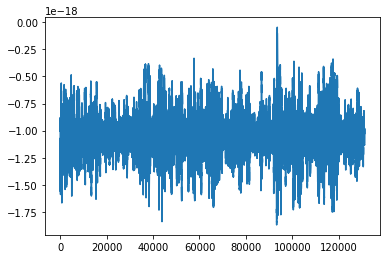

In [11]:
plt.plot(strain);

It used to be important to explicitly close the file in order to avoid problems. Conveniently, recent versions of h5py will auto-close. 

In [12]:
f.close()

<a id='tables'></a>  

## PyTables

In [13]:
import tables # NOT pytables
tables.__version__

'3.4.4'

Read in the same file as above. Note that the default display is MUCH more descriptive/verbose than for h5py.

In [16]:
tbl = tables.open_file('L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5', 'r')
tbl

File(filename=L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/meta (Group) ''
/meta/Description (UnImplemented()) ''
  NOTE: <The UnImplemented object represents a PyTables unimplemented
         dataset present in the 'L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5' HDF5 file.  If you want to see this
         kind of HDF5 dataset implemented in PyTables, please contact the
         developers.>

/meta/DescriptionURL (UnImplemented()) ''
  NOTE: <The UnImplemented object represents a PyTables unimplemented
         dataset present in the 'L-L1_GWOSC_4KHZ_R1-1126259447-32.hdf5' HDF5 file.  If you want to see this
         kind of HDF5 dataset implemented in PyTables, please contact the
         developers.>

/meta/Detector (UnImplemented()) ''
  NOTE: <The UnImplemented object represents a PyTables unimplemented
         dataset present in the

In [15]:
tbl.list_nodes('/')

[/meta (Group) ''
   children := ['Description' (UnImplemented), 'DescriptionURL' (UnImplemented), 'Detector' (UnImplemented), 'Duration' (Array), 'GPSstart' (Array), 'Observatory' (UnImplemented), 'Type' (UnImplemented), 'UTCstart' (UnImplemented)],
 /quality (Group) ''
   children := ['detail' (Group), 'injections' (Group), 'simple' (Group)],
 /strain (Group) ''
   children := ['Strain' (CArray)]]

___TODO___ : finish this section when I get my head around it